<a href="https://colab.research.google.com/github/kcarte09/Heart-Attack-ML-Classifications/blob/main/Heart_Attack_Analysis_(5_ML_models).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### HEART ATTACK ANALYSIS

In [2]:
# importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [3]:
heart = pd.read_csv("/content/heart.csv")
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


Cleaning Data

In [4]:
# checking for null variables
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart.duplicated().sum()

1

In [7]:
heart.drop_duplicates(inplace=True)

In [8]:
# summary stats

print(f"Summary statistics:")
heart.describe()

Summary statistics:


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

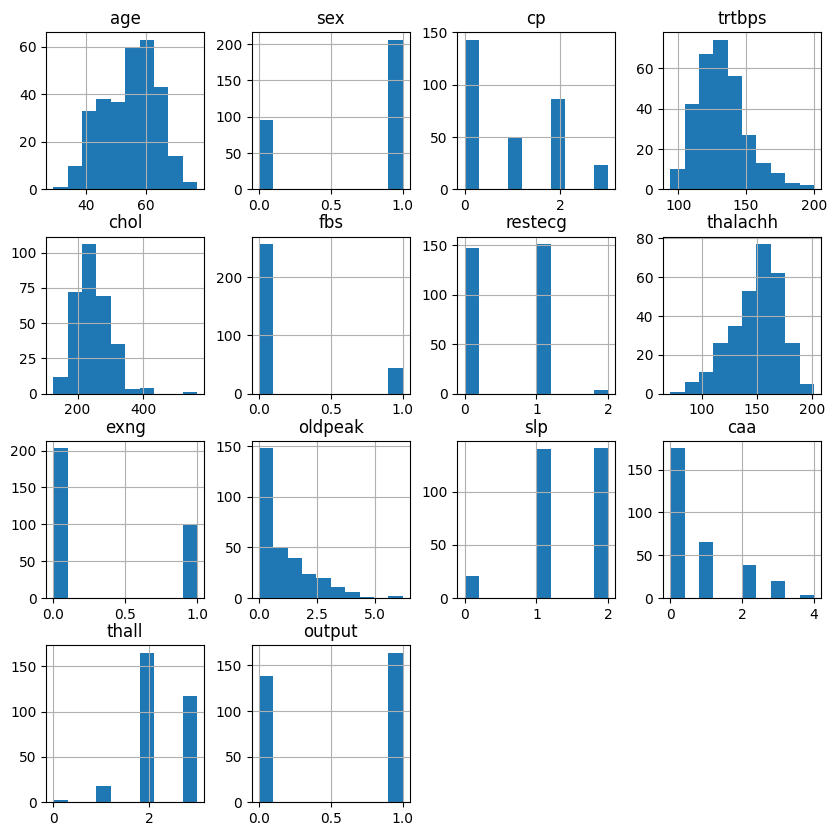

In [9]:
heart.hist(figsize = (10,10))

Correlation Matrix

In [10]:
corr = heart.corr()
corr

# correlation with target variable

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trtbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalachh,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exng,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<Figure size 1400x1000 with 0 Axes>

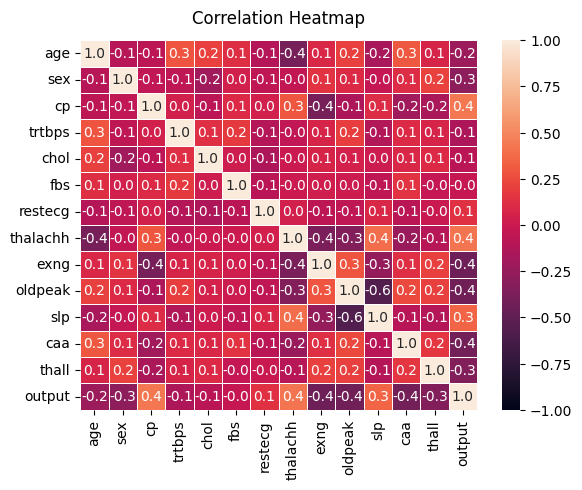

<Figure size 1400x1000 with 0 Axes>

In [11]:
# correlation heat map

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(heart.corr(), vmin=-1, vmax=1, annot=True, fmt = ".1f", linewidths = .7)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12,)
plt.figure(figsize=(14, 10))

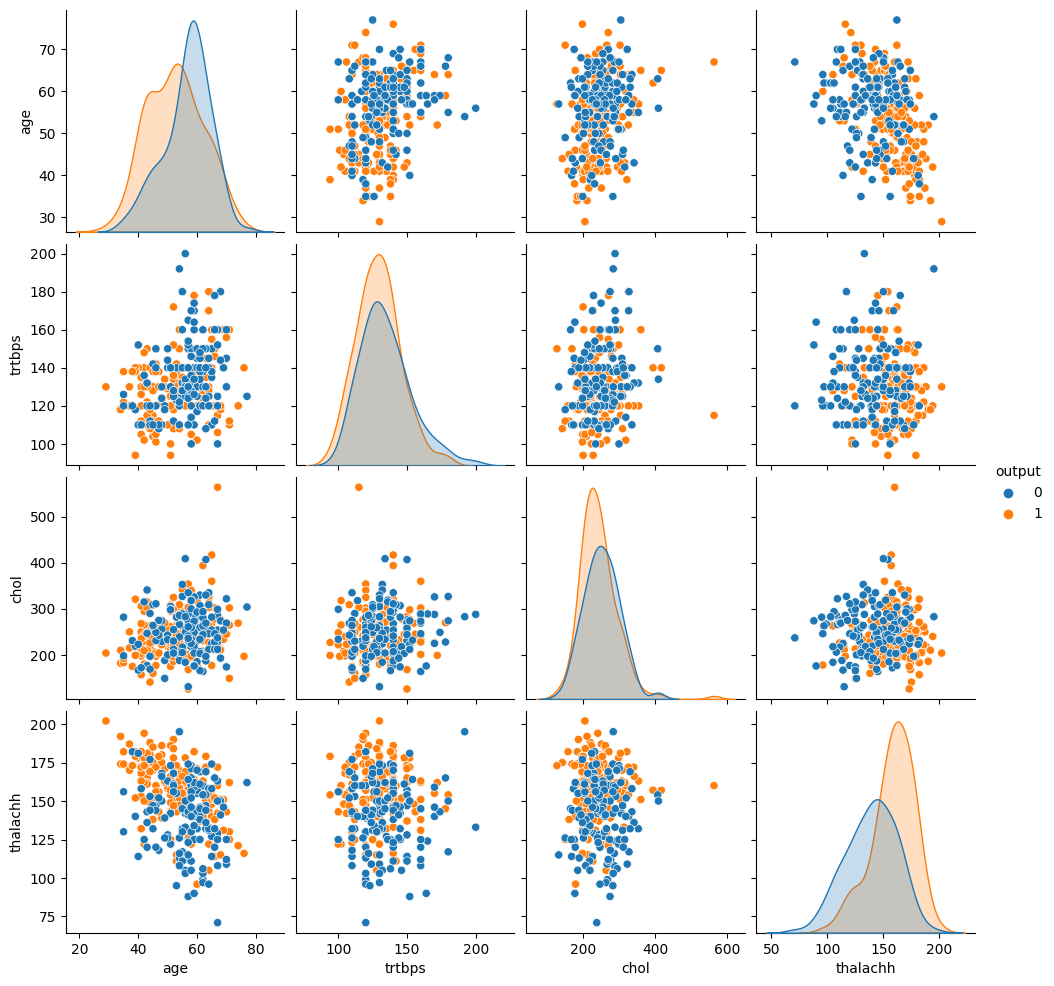

In [12]:
# pair plot of continous variables
numeric_vars = ['age', "trtbps","chol","thalachh","output"]
df_numeric = heart.loc[:, numeric_vars]
sns.pairplot(df_numeric, hue='output', diag_kind = 'kde')
plt.show()

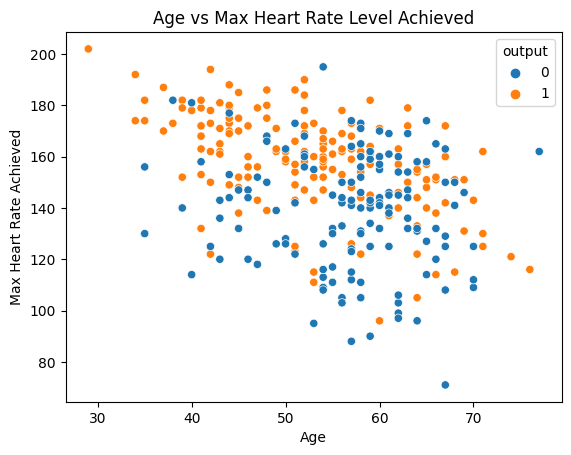

In [13]:
# scatterplot
sns.scatterplot(x='age', y='thalachh', hue='output', data=heart)
plt.title('Age vs Max Heart Rate Level Achieved')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate Achieved')
plt.show()
# as age increases, maximum heart rate decreases

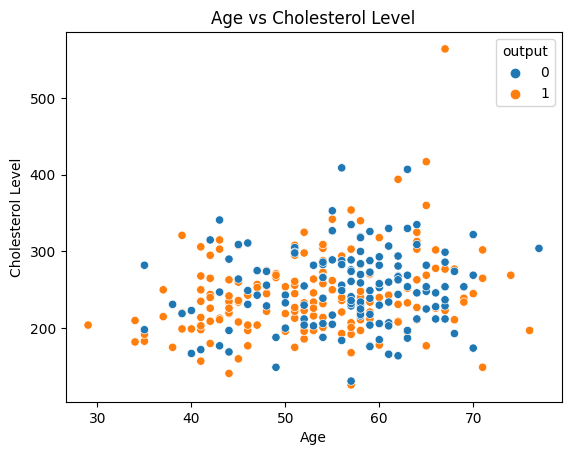

In [14]:
sns.scatterplot(x='age', y='chol', data=heart, hue='output')
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')
plt.show()
# as age increases, cholestoral in mg/dl increases

Creating x and y variable

In [15]:

y = heart['output']
x = heart.drop('output', axis=1)

- If you don't specify the random_state in the code, then every time you run(execute) your code a new random value is generated and the train and test datasets would have different values each time.

However, if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [16]:
# data splitting
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [17]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [18]:
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((91, 13), (91,))

Model 1: Logisitic Regression

In [19]:
# building logit model
lr = LogisticRegression()

In [20]:
# training model
lr.fit(x_train, y_train)

LogisticRegression()

In [21]:
# evaluate target
y_pred = lr.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1])

In [22]:
# accuracy scores and confusion maxtric
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print('Confussion matrix:')
print(conf_matrix)
print('\n') # prints new line with space
print('Accuracy of Logistic Regression:', accuracy*100)
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Confussion matrix:
[[34  8]
 [ 9 40]]


Accuracy of Logistic Regression: 81.31868131868131


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        42
           1       0.83      0.82      0.82        49

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Model 2: Naive Bayes
- using to test hypothesis i.e. whether someone will have a heart attack or not

In [23]:
# building model
m2 = 'Naive Bayes'
nb = GaussianNB()
# fitting model
nb.fit(x_train, y_train)
# y_pred
nbpred = nb.predict(x_test)
nb_conf_matrix = confusion_matrix(y_test, nbpred)
nb_acc_score = accuracy_score(y_test, nbpred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:",nb_acc_score*100,'\n')
print(classification_report(y_test,nbpred))


confussion matrix
[[37  5]
 [ 9 40]]


Accuracy of Naive Bayes model: 84.61538461538461 

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        42
           1       0.89      0.82      0.85        49

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



Model 3: Random Forest Classifier

In [24]:
m3 = 'Random Forest Classifier'
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_acc_score = accuracy_score(y_test, rf_pred)

print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_pred))

confussion matrix
[[34  8]
 [ 7 42]]


Accuracy of Random Forest: 83.51648351648352 

              precision    recall  f1-score   support

           0       0.83      0.81      0.82        42
           1       0.84      0.86      0.85        49

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



Model 4: K-NN

In [25]:
#crearte variable for model
m4 = 'K-NeighborsClassifier'
# build model
knn = KNeighborsClassifier(n_neighbors=10)
#train model with training data x & y
knn.fit(x_train, y_train)
#create prediction using x_test
knn_y_pred = knn.predict(x_test)
# create confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
# create accuracy
acc_knn = accuracy_score(y_test, knn_y_pred)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",acc_knn*100,'\n')
print(classification_report(y_test,knn_y_pred))

confussion matrix
[[36  6]
 [ 9 40]]


Accuracy of K-NeighborsClassifier: 83.51648351648352 

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        42
           1       0.87      0.82      0.84        49

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



Model 5: Decision Tree Classifier

In [26]:
# variable for model
m6 = 'DecisionTreeClassifier'
# build model
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
# train model
dt.fit(x_train, y_train)
# build y_pred
dt_pred = dt.predict(x_test)
# return confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_pred)
# return accuracy scores
dt_acc_score = accuracy_score(y_test, dt_pred)
print('Confusion Matrix: ')
print(dt_conf_matrix)
print('\n')
print('Accuracy of Decision Tree:', dt_acc_score*100, '\n')
print('\n')
print(classification_report(y_test, dt_pred))

Confusion Matrix: 
[[35  7]
 [13 36]]


Accuracy of Decision Tree: 78.02197802197803 



              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.84      0.73      0.78        49

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91



Model 6: Support Vector Classifier

In [27]:
# variable for model name
m6 = 'Support Vector Classifier'
# building model
svc = SVC(kernel='rbf', C=2)
# training model
svc.fit(x_train, y_train)
# y pred
svc_pred = svc.predict(x_test)
# accuracy
svc_acc_score = accuracy_score(y_test, svc_pred)
# confusion matrix
svc_conf_matrix = confusion_matrix(y_test, svc_pred)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_pred))

confussion matrix
[[35  7]
 [ 9 40]]


Accuracy of Support Vector Classifier: 82.41758241758241 

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        42
           1       0.85      0.82      0.83        49

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



Classification Report

In [28]:
model_eval = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes','Random Forest',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [accuracy, acc_knn, nb_acc_score, rf_acc_score, dt_acc_score, svc_acc_score]})
model_eval.sort_values(by='Accuracy', ascending=False)


,Model,Accuracy
2,Random Forest,0.846154
1,Naive Bayes,0.835165
3,K-Nearest Neighbour,0.835165
5,Support Vector Machine,0.824176
0,Logistic Regression,0.813187
4,Decision Tree,0.780220
